# Exploratory Data Analysis

Impor the `housing` dataset and plot the:

 - Scatterplot Matrix
 - Correlation Matrix (Pearson Product-Moment Correlation Matrix)
 

### Head

In [13]:
import pandas as pd

df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Scatterplot Matrix

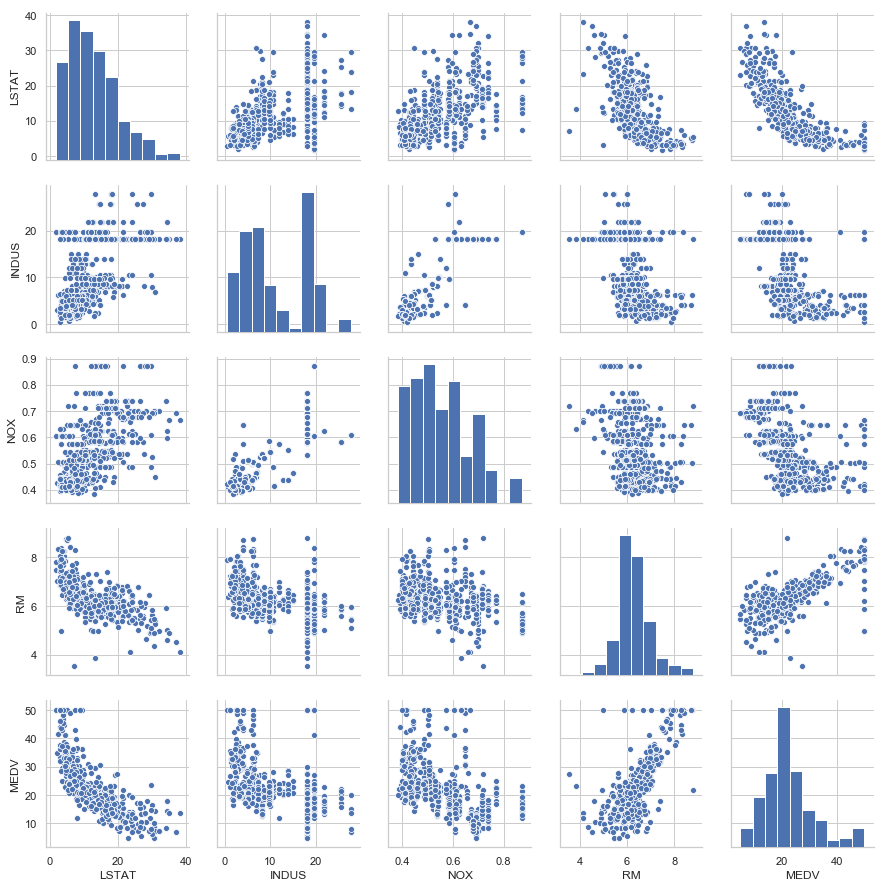

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()


### Correlation Matrix (Pearson Product-Moment Correlation Matrix)

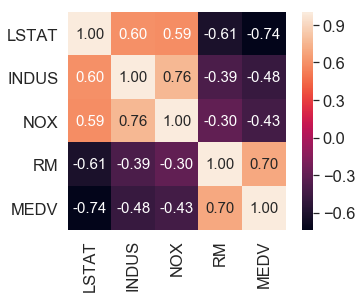

In [15]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',\
annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

### Linear Regression : Ordinary Least Squares

Ordinary Least Squares implementation with Gradient Descent as the optimizer. 

 $\widehat{y} = w_{0} + w^{T}x$
 
 The loss function __$J(w)$__ is the following:
 
 $J(w) = \frac{1}{2}\sum{(y^{(i)}-\widehat{y}^{(i)})^2}$

 Minimized via __Gradient Decent__:
 
 $ w_{j} = w_{j-1}+\eta*x^{T}*(\widehat{y}-y)$


In [16]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        if X.ndim > 1:
            self.w_ = np.zeros(1 + X.shape[1])
        else:
            self.w_ = np.zeros(2)
            
        self.cost_ = []

        #epoch iterations
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        output = []
        for i in range(X.shape[0]):
            output = np.append(output,np.dot(X[i], self.w_[1:]) + self.w_[0])
        return output

    def predict(self, X):
        return self.net_input(X)

## Standardize Input Data

__Standardization__ yields better convergence of the Gradient Descent algorithm. 

A standardized dataset has undergone the following tranformation:

$X_{standard} = \frac{X-\mu_{X}}{\sigma_{X}}$

(i.e. the mean is subtracted and the result scaled by the sample variance.) 

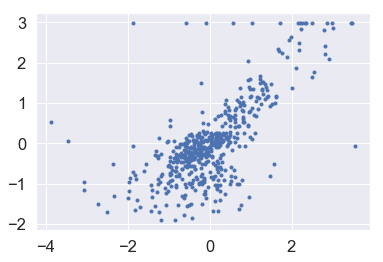

In [17]:
from sklearn.preprocessing import StandardScaler

X = df['RM'].values
y = df['MEDV'].values

def standardizeData(X,Y):
    
    data = [[X[0],Y[0]]]
    
    for i in range(1,X.shape[0]):
        data.append([X[i],Y[i]])
    
    scaler = StandardScaler()
    
    scaler.fit(data)
    
    data_std = scaler.transform(data)
    
    X_std = np.array([data_std[0][0]])
    Y_std = np.array([data_std[0][1]])
    
    
    for i in range(1,len(data_std)):
        X_std = np.append(X_std,[data_std[i][0]],axis=0)
        Y_std = np.append(Y_std,[data_std[i][1]],axis=0)
    
    
    return (X_std,Y_std)


(X_std,y_std) =  standardizeData(X,y)

plt.plot(X_std,y_std,".")
lr = LinearRegressionGD(0.001,20)
lr.fit(X_std, y_std)


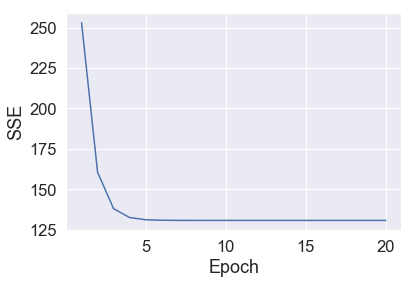

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [19]:
 def lin_regplot(X, y, model):
        plt.scatter(X, y, c='blue')
        plt.plot(X, model.predict(X), color='red')
        return None

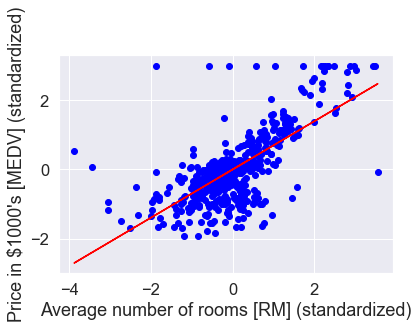

In [20]:

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

### Parameters of the Regression

Parameters in terms of the weights $w_{i}$, $i=1...m$ (i.e. the slope) and the y-intercept ($w_{0}$). 

In [21]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])


Slope: 0.695
Intercept: 0.000
